
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [63]:
import pandas as pd
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [64]:
# Perform what ever steps you need to familiarize yourself with the data:
bank.shape

(4119, 21)

In [65]:
bank.describe

<bound method NDFrame.describe of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

     

In [66]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [67]:
for i in bank.columns:
    unknowns = len(bank[bank[i] == 'unknown'])
    if (unknowns):
        print(i, ":", unknowns, "unknowns")

job : 39 unknowns
marital : 11 unknowns
education : 167 unknowns
default : 803 unknowns
housing : 105 unknowns
loan : 105 unknowns



## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [68]:
# A:
bank.housing.value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [69]:
bank['housing_imputed'] = bank['housing'].map({'yes': 1, 'no': 0, 'unknown': 1})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_imputed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1



## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [70]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  

In [71]:
# convert selected features do dummies
lr = LogisticRegression()

# set the model
feature_cols = ['housing_imputed', 'age', 'duration']

# set x and y
X = bank[feature_cols]
y = bank.y

# train test splot
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .2)

# fit model
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(lr.intercept_)
print(lr.coef_)

[-3.91815388]
[[-0.09736103  0.01451491  0.00377462]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [72]:
# A:
metrics.accuracy_score(y_pred, y_test)

0.8871359223300971

### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [73]:
# A;
lr2 = LogisticRegression()

feature_cols = ['nr.employed','cons.price.idx','euribor3m']

X = bank[feature_cols]
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .2)

lr2.fit(X_train,y_train)
y_pred = lr.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8762135922330098



### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [74]:
# A:
lr2.predict_proba(X_test)

array([[0.81797307, 0.18202693],
       [0.96078218, 0.03921782],
       [0.81467469, 0.18532531],
       ...,
       [0.94887025, 0.05112975],
       [0.96578716, 0.03421284],
       [0.84193737, 0.15806263]])

**Visualize the distribution**

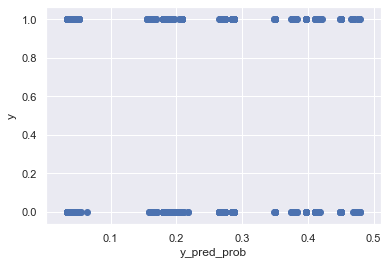

In [75]:
# A:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1);

bank['y_pred_prob'] = lr2.predict_proba(X)[:, 1]

plt.scatter(bank.y_pred_prob, bank.y);

plt.xlabel('y_pred_prob');
plt.ylabel('y');

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [76]:
# A:
import numpy as np
bank['y_pred_class'] = np.where(bank.y_pred_prob >= 0.25, 1, 0)

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_imputed,y_pred_prob,y_pred_class
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1,0.182027,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0,0.050695,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1,0.045831,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1,0.045877,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,0.049215,0


**Evaluate the model metrics now**

In [77]:
# A:
metrics.accuracy_score(bank.y_pred_class, bank.y)

0.8863801893663511

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [78]:
# A:
for i in bank.columns:
    unknowns = len(bank[bank[i] == 'unknown'])
    if (unknowns):
        print(i, ":", unknowns, "unknowns")

job : 39 unknowns
marital : 11 unknowns
education : 167 unknowns
default : 803 unknowns
housing : 105 unknowns
loan : 105 unknowns


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [79]:
print(bank.job.value_counts())
bank['job'].replace('unknown', 'admin.',inplace=True)

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64


In [80]:
print(bank.marital.value_counts())
bank['marital'].replace('unknown', 'married',inplace=True)

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64


In [81]:
print(bank.education.value_counts())
bank['education'].replace('unknown', 'university.degree',inplace=True)

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64


In [82]:
print(bank.default.value_counts())
bank['default'].replace('unknown', 'no',inplace=True)

no         3315
unknown     803
yes           1
Name: default, dtype: int64


In [83]:
print(bank.housing.value_counts())
bank['housing'].replace('unknown', 'yes',inplace=True)

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64


In [84]:
print(bank.loan.value_counts())
bank['loan'].replace('unknown', 'no',inplace=True)

no         3349
yes         665
unknown     105
Name: loan, dtype: int64


In [85]:
for i in bank.columns:
    unknowns = len(bank[bank[i] == 'unknown'])
    if (unknowns):
        print(i, ":", unknowns, "unknowns")

In [86]:
bank.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
housing_imputed      int64
y_pred_prob        float64
y_pred_class         int64
dtype: object

In [87]:
dummies = [
'job',                
'marital',            
'education',          
'default',            
'housing',            
'loan',               
'contact',            
'month',              
'day_of_week',
'poutcome'
]

for i in dummies: 
    bank = bank.join(pd.get_dummies(bank[i], prefix=i, drop_first = True))

In [89]:
bank.drop(dummies, axis = 1,inplace = True);
bank.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
housing_imputed                    int64
y_pred_prob                      float64
y_pred_class                       int64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_married 

In [91]:
lr = LogisticRegression(max_iter = 5000)


X = bank.drop(['y','housing_imputed','y_pred_prob','y_pred_class'], axis =1)
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .3)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

y_test.value_counts()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0    1081
1     155
Name: y, dtype: int64

In [93]:
print(1081/(1081 + 155))
print(metrics.accuracy_score(y_pred, y_test))

unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

0.8745954692556634
0.9085760517799353
[[   0 1144]
 [   1   92]]


## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'